# Fun with TensorBoard

In [2]:
import tensorflow as tf

In [3]:
a = tf.constant(2, name='a')
b = tf.constant(3, name='b')
x = tf.add(a, b, name='add')

In [4]:
print(x)

Tensor("add:0", shape=(), dtype=int32)


In [5]:
sess = tf.Session()

writer = tf.summary.FileWriter('./temp', sess.graph)
print("a+b=%r" % sess.run(x))

writer.close()

a+b=5


# Constant Type

In [6]:
input_tensor = [[0,1],[2,3],[4,5]]

# [[0,0,0],[0,0,0]]
op_zeros = tf.zeros([2,3], tf.int32)

# [[0,0],[0,0],[0,0]]
op_zeros_like = tf.zeros_like(input_tensor)

# [[1,1,1],[1,1,1]]
op_ones = tf.ones([2,3], tf.int32)

# [[1,1],[1,1],[1,1]]
op_ones_like = tf.ones_like(input_tensor)

# [[8,8,8],[8,8,8]]
op_fill = tf.fill([2,3], 8)

op_zeros, op_zeros_like, op_ones, op_ones_like, op_fill = \
    sess.run([op_zeros, op_zeros_like, op_ones, op_ones_like, op_fill])

In [7]:
print("op_zeros=\n%r" % op_zeros)

op_zeros=
array([[0, 0, 0],
       [0, 0, 0]])


In [8]:
print("op_zeros_like=\n%r" % op_zeros_like)

op_zeros_like=
array([[0, 0],
       [0, 0],
       [0, 0]])


In [9]:
print("op_ones=\n%r" % op_ones)

op_ones=
array([[1, 1, 1],
       [1, 1, 1]])


In [10]:
print("op_ones_like=\n%r" % op_ones_like)

op_ones_like=
array([[1, 1],
       [1, 1],
       [1, 1]])


In [12]:
print("op_fill=\n%r" % op_fill)

op_fill=
array([[8, 8, 8],
       [8, 8, 8]])


In [13]:
op_linspace = tf.linspace(10.0, 13.0, 4, name="linspace")

start = 3
limit = 18
delta = 3
op_range_limit18_start3_delta3 = tf.range(start, limit, delta)

limit = 5
op_range_limit5_default = tf.range(limit)

op_linspace,op_range_limit18_start3_delta3,op_range_limit5_default = \
    sess.run([op_linspace,op_range_limit18_start3_delta3,op_range_limit5_default])
    
print("op_linspace=\t\t\t%r" % op_linspace)
print("op_range_limit18_start3_delta3=\t%r" % op_range_limit18_start3_delta3)
print("op_range_limit5_default=\t%r" % op_range_limit5_default)

op_linspace=			array([ 10.,  11.,  12.,  13.], dtype=float32)
op_range_limit18_start3_delta3=	array([ 3,  6,  9, 12, 15])
op_range_limit5_default=	array([0, 1, 2, 3, 4])


Notice
------

    Note that unlike NumPy or Python sequences, TensorFlow sequences are not iterable.

In [14]:
import numpy as np
for _ in np.linspace(0, 10, 4):
    print(_)

0.0
3.33333333333
6.66666666667
10.0


In [15]:
#for _ in tf.linspace(0.0, 10, 4):
#    print(_)

Generate random constant interfaces
--------
    tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
    tf.truncated_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
    tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)
    tf.random_shuffle(value, seed=None, name=None)
    tf.random_crop(value, size, seed=None, name=None)
    tf.multinomial(logits, num_samples, seed=None, name=None)
    tf.random_gamma(shape, alpha, beta=None, dtype=tf.float32, seed=None, name=None)

# Math Operations

In [16]:
a = tf.constant([3, 6])
b = tf.constant([2, 2])
op_add = tf.add(a, b) # >> [5 8]
op_add_n = tf.add_n([a, b, b]) # >> [7 10]. Equivalent to a + b + b
op_multiply = tf.multiply(a, b) # >> [6 12] because mul is element wise
op_matmul = tf.matmul(tf.reshape(a, shape=[1, 2]), tf.reshape(b, shape=[2, 1])) # >> [[18]]
op_div = tf.div(a, b) # >> [1 3]
op_mod = tf.mod(a, b) # >> [1 0]

op_add, op_add_n, op_multiply, op_matmul, op_div, op_mod = \
    sess.run([op_add, op_add_n, op_multiply, op_matmul, op_div, op_mod])

print("op_add=\t\t%r" % op_add)
print("op_add_n=\t%r" % op_add_n)
print("op_multiply=\t%r" % op_multiply)
print("op_matmul=\t%r" % op_matmul)
print("op_div=\t\t%r" % op_div)
print("op_mod=\t\t%r" % op_mod)


op_add=		array([5, 8])
op_add_n=	array([ 7, 10])
op_multiply=	array([ 6, 12])
op_matmul=	array([[18]])
op_div=		array([1, 3])
op_mod=		array([1, 0])


# Data Type

Python Naive Type
---------

In [17]:
t_0 = 19 # Treated as a 0-d tensor, or "scalar"
tf.zeros_like(t_0) # ==> 0
tf.ones_like(t_0) # ==> 1
t_1 = [b"apple", b"peach", b"grape"] # treated as a 1-d tensor, or "vector"
tf.zeros_like(t_1) # ==> ['' '' '']

#tf.ones_like(t_1) # ==> TypeError: Expected string, got 1 of type 'int' instead.

t_2 = [[True, False, False],
        [False, False, True],
        [False, True, False]] # treated as a 2-d tensor, or "matrix"
tf.zeros_like(t_2) # ==> 3x3 tensor, all elements are False
tf.ones_like(t_2) # ==> 3x3 tensor, all elements are True

<tf.Tensor 'ones_like_2:0' shape=(3, 3) dtype=bool>

TensorFlow Native Types
-----------

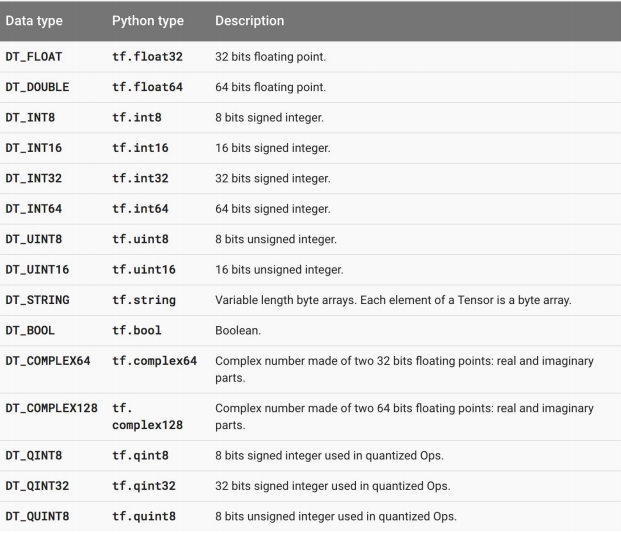

# Variable

Difference between variable and constant
--------
* A constant is constant. A variable can be assigned to, its value can be changed.
* A constant's value is stored in the graph and its value is replicated wherever the graph is loaded. A variable is stored separately, and may live on a parameter server.

Point 2 basically means that constants are stored in the graph definition. When constants are memory expensive, it will be slow each time you have to load the graph. To see the graph’s definition and what’s stored in the graph’s definition, simply print out the graph’s protobuf. Protobuf stands for protocol buffer, “Google's language-neutral, platform-neutral, extensible mechanism for serializing structured data – think XML, but smaller, faster, and simpler.”


In [18]:
g = tf.Graph()
with g.as_default():
    my_const = tf.constant([1.0, 2.0], name="my_const")
    print(g.as_graph_def())

node {
  name: "my_const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 2
          }
        }
        tensor_content: "\000\000\200?\000\000\000@"
      }
    }
  }
}
versions {
  producer: 24
}



In [19]:
#create variable a with scalar value
a = tf.Variable(2, name="scalar")
#create variable b as a vector
b = tf.Variable([2, 3], name="vector")
#create variable c as a 2x2 matrix
c = tf.Variable([[0, 1], [2, 3]], name="matrix")
# create variable W as 784 x 10 tensor, filled with zeros
W = tf.Variable(tf.zeros([784,10]))

# You have to initialize variables before using them.
init = tf.global_variables_initializer()
# only initial subset of varibles
# init_ab = tf.variables_initializer([a, b], name="init_ab")
sess.run(init)

# get(evaluate acttually) the variable value
print(W) # output varible type
print("\nEvaluate result:\n%r" % W.eval(session=sess))

<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>

Evaluate result:
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)


In [20]:
# assign values to variable
W = tf.Variable(10)
op_assign = W.assign(100)
sess.run(W.initializer)
print(W.eval(session=sess))

10


In [21]:
# notice the difference between vabiable W and operation op_assign
op_assign = sess.run(op_assign)
print(op_assign)

100


In [22]:
# create a variable whose original value is 2
a = tf.Variable(2, name="scalar")
# assign a * 2 to a and call that op a_times_two
a_times_two = a.assign(a * 2)
init = tf.global_variables_initializer()
sess.run(init)
# have to initialize a, because a_times_two op depends on the value of a
# TensorFlow assigns a*2 to a every time a_times_two is fetched.
print(sess.run(a_times_two)) # >> 4
print(sess.run(a_times_two)) # >> 8
print(sess.run(a_times_two)) # >> 16

4
8
16


In [23]:
# Inilize W for operations like assign_add, no necessary for assign,
# because assign doesn't depend on initial values of variables.
W = tf.Variable(10)
sess.run(W.initializer) 
print(sess.run(W.assign_add(10))) # >> 20
print(sess.run(W.assign_sub(2))) # >> 18


20
18


In [24]:
# each session has its own context
W = tf.Variable(10)
sess1 = tf.Session()
sess2 = tf.Session()
sess1.run(W.initializer)
sess2.run(W.initializer)
print(sess1.run(W.assign_add(10))) # >> 20
print(sess2.run(W.assign_sub(2))) # >> 8
print(sess1.run(W.assign_add(100))) # >> 120
print(sess2.run(W.assign_sub(50))) # >> -42
sess1.close()
sess2.close()

20
8
120
-42


In [25]:
# declare a vabiable depends on other variable.
W = tf.Variable(tf.truncated_normal([700, 10]))
# U = tf.Variable(W * 2)
U = tf.Variable(W.initialized_value() * 2) # ensure that W has beeen initialized.

# InteractiveSession

    You sometimes see InteractiveSession instead of Session. The only difference is an InteractiveSession makes itself the default session so you can call run() or eval() without explicitly call the session. This is convenient in interactive shells and IPython notebooks, as it avoids having to pass an explicit Session object to run ops. However, it is complicated when you have multiple sessions to run.

In [26]:
interactive_sess = tf.InteractiveSession()
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b
# We can just use 'c.eval()' without passing 'sess'
print(c.eval())
interactive_sess.close()

30.0


# Control Dependencies
    Sometimes, we will have two independent ops but you’d like to specify which op should be run first, then you use tf.Graph.control_dependencies(control_inputs)

In [27]:
# your graph g have 5 ops: a, b, c, d, e
#with g.control_dependencies([a, b, c]):
 # `d` and `e` will only run after `a`, `b`, and `c` have executed.
 #d = ...
 #e = ...


# Placeholders and feed_dict
    Remember from the lecture 1 that a TensorFlow program often has 2 phases:
        Phase 1: assemble a graph
        Phase 2: use a session to execute operations in the graph.
        
    Therefore, we can assemble the graphs first without knowing the values needed for computation. This is equivalent to defining the function of x, y without knowing the values of x, y.
    
    For example, f(x, y) = x*2 + y. x, y are placeholders for the actual values.
    
    With the graph assembled, we, or our clients, can later supply their own data when they need to execute the computation.


In [28]:
# create a placeholder of type float 32-bit, shape is a vector of 3 elements
a = tf.placeholder(tf.float32, shape=[3], name='a')
# create a constant of type float 32-bit, shape is a vector of 3 elements
b = tf.constant([5, 5, 5], tf.float32, name='b')
# use the placeholder as you would a constant or a variable
c = a + b # Short for tf.add(a, b)

# If we try to fetch c, we will run into error.
# print(sess.run(c))
print(sess.run(c, {a: [1, 2, 3]}))

[ 6.  7.  8.]


In [29]:
print(tf.get_default_graph().is_feedable(tensor=a))

True
